In [1]:
import cv2
import numpy as np
from scipy import ndimage



In [3]:
img = cv2.imread('car.jpg')

# Display the image
cv2.imshow('Image', img)
cv2.waitKey(0)  # Wait for any key press
cv2.destroyAllWindows() 

making the image black and white

In [8]:
blackandwhiteimage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [9]:
id_ker = np.array([[0, 0, 0],
                            [0, 1, 0],
                            [0, 0, 0]])

e_detker = np.array([[1, 0, -1],
                                   [0, 0, 0],
                                   [-1, 0, 1]])

sharpen_ker = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

box = np.ones((3, 3), dtype=np.float32) / 9

id = cv2.filter2D(blackandwhiteimage, -1, id_ker)
edge = cv2.filter2D(blackandwhiteimage, -1, e_detker)
sharpen = cv2.filter2D(blackandwhiteimage, -1, sharpen_ker)
boxblur = cv2.filter2D(blackandwhiteimage, -1, box)

reflect = ndimage.convolve(blackandwhiteimage, e_detker, mode='reflect')
constant = ndimage.convolve(blackandwhiteimage, e_detker, mode='constant')
nearest = ndimage.convolve(blackandwhiteimage, e_detker, mode='nearest')
mirror = ndimage.convolve(blackandwhiteimage, e_detker, mode='mirror')
wrap = ndimage.convolve(blackandwhiteimage, e_detker, mode='wrap')



Displaying the results

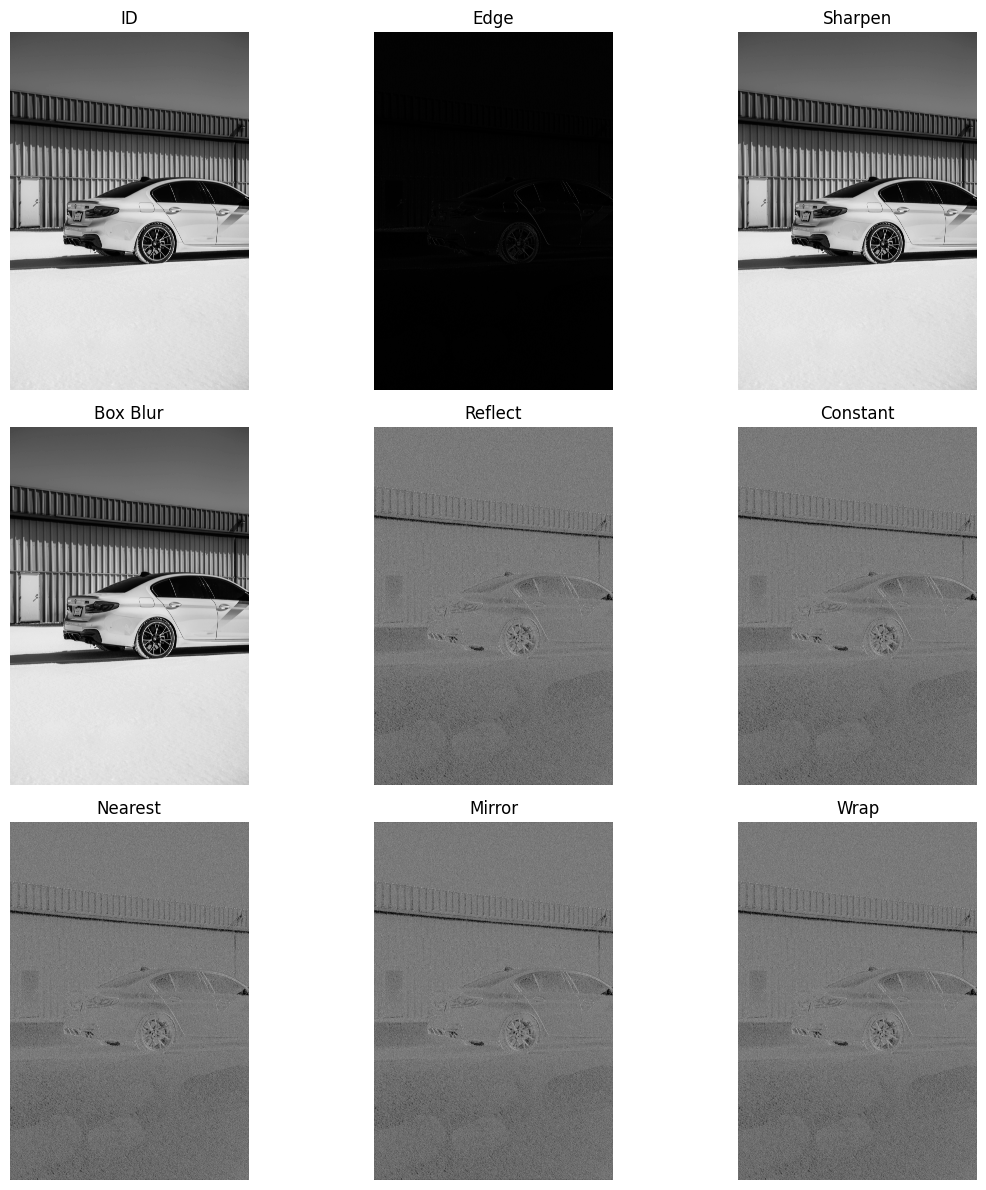

In [12]:
import matplotlib.pyplot as plt

# Define the images and their titles
images = [id, edge, sharpen, boxblur, reflect, constant, nearest, mirror, wrap]
titles = ['ID', 'Edge', 'Sharpen', 'Box Blur', 'Reflect', 'Constant', 'Nearest', 'Mirror', 'Wrap']

# Create a 3x3 subplot grid
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Loop through each image and title to display
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')  # Assuming images are grayscale
    ax.set_title(titles[i])
    ax.axis('off')

plt.tight_layout()
plt.show()




1. **Identity Kernel**: The identity kernel preserves the original image without any changes. It acts as a neutral pass-through filter, maintaining the image as it is.

2. **Edge Detection Kernel**: This kernel highlights edges within the image, making them more prominent. It achieves this by emphasizing areas of high contrast, such as the boundaries between objects.

3. **Sharpen Kernel**: The sharpen kernel enhances edges within the image, making them appear more defined and crisp. It achieves this by amplifying the contrast along edges, effectively sharpening details.

4. **Box Blur Kernel**: The box blur kernel smoothens the image by averaging the pixel values within a defined neighborhood. It effectively reduces noise and minor details in the image, resulting in a more blurred appearance.

5. **Convolution with Different Modes**: When convolving an image with different modes, such as reflect, constant, nearest, mirror, and wrap, it changes how the edges are detected based on the method of handling boundaries or padding around the image. Each mode introduces different boundary conditions, affecting how the kernel interacts with the pixels at the image borders.
